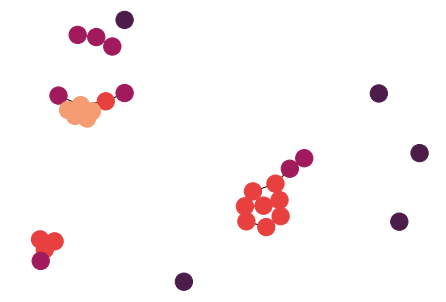

In [10]:
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

# G = nx.karate_club_graph()

# sizes = [75, 75, 75]
# probs = [[0.25, 0.05, 0.05], 
#          [0.05, 0.25, 0.05], 
#          [0.05, 0.05, 0.25]]
# G = nx.stochastic_block_model(sizes, probs, seed=0)

G = nx.random_partition_graph([10, 10, 10], 0.25, 0.01)


cores = nx.core_number(G)  

core_degrees = {}
for k in set(cores.values()):
    core_nodes = [n for n in cores if cores[n] >= k]
    periphery_nodes = [n for n in cores if cores[n] < k]

    if len(periphery_nodes) == 0:
        coreness = 1
    else:
        coreness = len(core_nodes) / len(periphery_nodes)

    core_degrees[k] = coreness

# Create color map 
n = len(set(cores.values()))
core_color = {k:v for k, v in zip(core_degrees.keys(), sns.color_palette("rocket", n_colors=n))} 

# Color nodes
node_colors = [core_color[cores[n]] for n in G.nodes()]

# Draw network
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=node_colors)
plt.show()

In [41]:
import networkx as nx
import itertools

def calculate_clustering(G):
    total = 0
    possible = 0
    for v in G.nodes():
        k = len(G[v]) # degree
        if k < 2:
            continue
            
        Tv = 0 # number of triangles around v
        for u,w in itertools.combinations(G[v], 2):
            if w in G[u]: 
                Tv += 1
                
        possible += k*(k-1)/2
        total += Tv
    
    return total/possible

G = nx.karate_club_graph()

print(calculate_clustering(G))

0.2556818181818182


In [48]:
import networkx as nx

def calculate_centralization(G):
    n = len(G.nodes())
    if n <= 2:
        return 0
    
    total_possible = (n-1)*(n-2)
    actual = 0
    
    for v in G.nodes():
        deg_v = G.degree(v)
        actual += (n-1) - deg_v
        
    return actual / total_possible

G = nx.karate_club_graph() 
# G = nx.complete_graph(10) 
# G = nx.star_graph(10) 

print(calculate_centralization(G))

0.9147727272727273


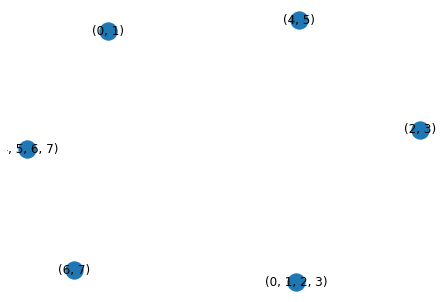

In [6]:
import networkx as nx

# Define the given subsets
coms = [
    ([0, 1, 2, 3], [4, 5, 6, 7]),
    ([0, 1], [2, 3], [4, 5, 6, 7]),
    ([0, 1], [2, 3], [4, 5], [6, 7]),
]

# Create an empty directed graph
G = nx.DiGraph()

# Add all subsets as nodes to the graph
for subsets in coms:
    for subset in subsets:
        G.add_node(tuple(subset))

# Iterate over the subsets and for each subset find its parent set and add an edge from the parent to the child
for subsets in coms:
    parent = set(subsets[0])
    for i in range(1, len(subsets)):
        child = set(subsets[i])
        if child.issubset(parent):
            G.add_edge(tuple(parent), tuple(child))

nx.draw(G, with_labels=True)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:2845: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim([0, dvw])


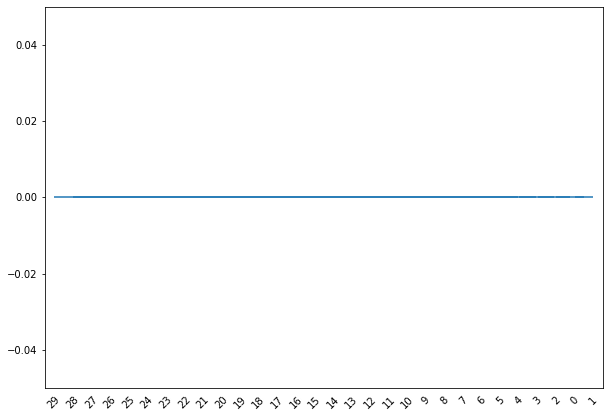

In [45]:
import networkx as nx

data = [
    ([0, 1, 2, 3], [4, 5, 6, 7]),
    ([0, 1], [2, 3], [4, 5, 6, 7]),
    ([0, 1], [2, 3], [4, 5], [6, 7]),
]

# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph
for level in data:
    for nodes in level:
        G.add_node(tuple(nodes))

# Add edges to the graph based on the containment relationship
for i in range(len(data) - 1):
    for nodes1 in data[i]:
        for nodes2 in data[i + 1]:
            if set(nodes1).issubset(set(nodes2)):
                G.add_edge(tuple(nodes2), tuple(nodes1))

# Visualization (optional)
import matplotlib.pyplot as plt

pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=10, font_weight='bold')
labels = {node: str(node) for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels=labels)
plt.show()

In [34]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist, squareform
import numpy as np
import itertools


# G = nx.karate_club_graph()
# G = nx.powerlaw_cluster_graph(100, 3, 0.2)
G = nx.path_graph(10)

comp = nx.community.girvan_newman(G)

# first_level_communities = tuple(sorted(c) for c in next(comp))


In [35]:
for c in comp:
    print(c)

({0, 1, 2, 3, 4}, {5, 6, 7, 8, 9})
({0, 1}, {2, 3, 4}, {5, 6, 7, 8, 9})
({0, 1}, {2, 3, 4}, {5, 6}, {8, 9, 7})
({0, 1}, {2}, {3, 4}, {5, 6}, {8, 9, 7})
({0, 1}, {2}, {3, 4}, {5, 6}, {7}, {8, 9})
({0}, {1}, {2}, {3, 4}, {5, 6}, {7}, {8, 9})
({0}, {1}, {2}, {3}, {4}, {5, 6}, {7}, {8, 9})
({0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8, 9})
({0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8}, {9})


In [36]:
dendrogram = sch.to_tree(comp)

TypeError: Linkage matrix 'Z' must contain doubles.

In [29]:
for communities in itertools.islice(comp, 2):
    print(tuple(sorted(c) for c in communities))

([0, 1], [2, 3, 4], [5, 6, 7, 8, 9])
([0, 1], [2, 3, 4], [5, 6], [7, 8, 9])


In [51]:
import networkx as nx
import pymc3 as pm

# Generate a test network
g = nx.erdos_renyi_graph(100, 0.05) 

# Model specification in PyMC3
with pm.Model() as model:
  
  p = pm.Uniform('p', 0, 1) 
  
  G = pm.Exponential('G', pm.DiscreteUniform.dist(0, 1), testval=g) 
  
  lambda_edges = pm.math.log(p / (1 - p)) * G.edges.sum()
  
  lambda_2stars = pm.math.log(p) * G.number_of_subgraphs({1: 2})
  
  lambda_triangles = pm.math.log(p) * G.number_of_subgraphs({1: 3})
   
  lambda_ = lambda_edges + lambda_2stars + lambda_triangles
  
  pm.Potential('likelihood', lambda_)



TypeError: float() argument must be a string or a real number, not 'DiscreteUniform'

In [ ]:
# Fit the model
with model:
  trace = pm.sample(10000)

In [33]:
%run './model/multi_corpus.py'
%run './model/ergm_functions.py'
%run './constants.py'

import numpy as np
import networkx as nx
import itertools

In [29]:
corpora = co_occurence_graphs(n_edges=100)
Gs = {field_name: corpus['G'] for (field_name, corpus) in corpora.items()}
Dfs = {field_name: corpus['Df'] for (field_name, corpus) in corpora.items()}

Gender Studies Graph with 57 nodes and 100 edges
Geometry Graph with 61 nodes and 100 edges
Geophysics Graph with 63 nodes and 100 edges
Economics Graph with 50 nodes and 100 edges
Language & Linguistics Graph with 58 nodes and 100 edges
Probability & Statistics Graph with 58 nodes and 100 edges
Material Engineering Graph with 49 nodes and 100 edges
Artificial Intelligence Graph with 49 nodes and 100 edges
Sociology Graph with 76 nodes and 100 edges
International Business Graph with 51 nodes and 100 edges
Political Science Graph with 56 nodes and 100 edges
Genetics & Genomics Graph with 71 nodes and 100 edges
Immunology Graph with 92 nodes and 100 edges
Human Resources & Organizations Graph with 66 nodes and 100 edges
Ethnic & Cultural Studies Graph with 52 nodes and 100 edges
Neurology Graph with 46 nodes and 100 edges


In [37]:
U = {}
V = {}

for field_1, field_2 in itertools.combinations(Gs.keys(), 2):
    
    G_1 = Gs[field_1]
    G_2 = Gs[field_2]

    M_1 = nx.adjacency_matrix(G_1).todense()
    M_2 = nx.adjacency_matrix(G_2).todense()

    U_M_1, s_M_1, V_M_1 = np.linalg.svd(M_1)
    U_M_2, s_M_2, V_M_2 = np.linalg.svd(M_2)

    U_norm = np.linalg.norm(U_M_1 - U_M_2, ord='fro')
    V_norm = np.linalg.norm(V_M_1 - V_M_2, ord='fro')

    U[(field_1, field_2)] = U_norm
    V[(field_1, field_2)] = V_norm

ValueError: operands could not be broadcast together with shapes (57,57) (61,61) 

In [26]:


# Generate complete network
complete_network = nx.complete_graph(10)
# gnp_network = nx.complete_graph(10)

# Generate G(n,p) network
gnp_network = nx.gnp_random_graph(10, 0.3)

# Convert networks to adjacency matrices
complete_matrix = nx.adjacency_matrix(complete_network).todense()
gnp_matrix = nx.adjacency_matrix(gnp_network).todense()

# Perform SVD
U_complete, s_complete, V_complete = np.linalg.svd(complete_matrix)
U_gnp, s_gnp, V_gnp = np.linalg.svd(gnp_matrix)

# Compare singular values
print("Singular Values Comparison:")
print("Complete Network:", s_complete)
print("G(n,p) Network:", s_gnp)

# Compare U matrices (using Frobenius norm)
u_norm = np.linalg.norm(U_complete - U_gnp, ord='fro')
print("\nU Matrix Comparison (Frobenius Norm):", u_norm)

# Compare V matrices (using Frobenius norm)
v_norm = np.linalg.norm(V_complete - V_gnp, ord='fro')
print("V Matrix Comparison (Frobenius Norm):", v_norm)

Singular Values Comparison:
Complete Network: [9. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
G(n,p) Network: [2.76549613 2.         1.88242669 1.82603254 1.27162113 0.89047331
 0.8299369  0.58164482 0.19245038 0.        ]

U Matrix Comparison (Frobenius Norm): 4.54523033858601
V Matrix Comparison (Frobenius Norm): 4.556511923019447


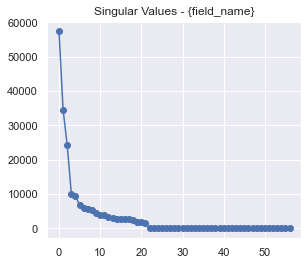

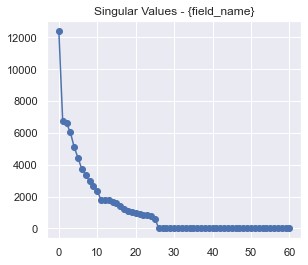

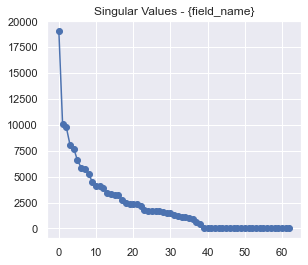

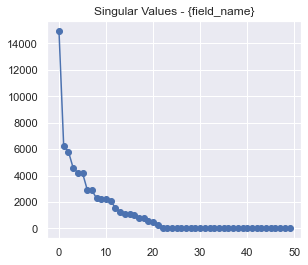

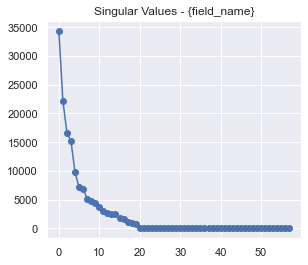

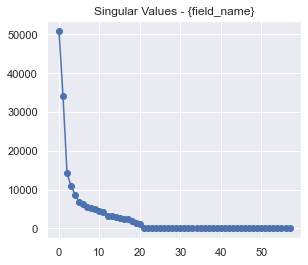

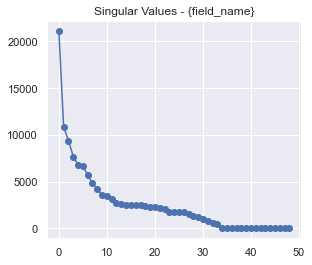

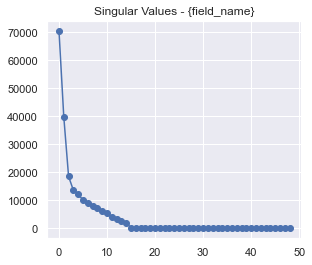

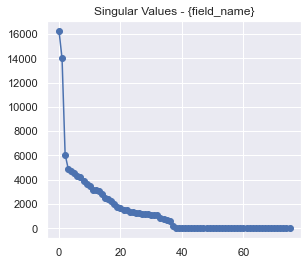

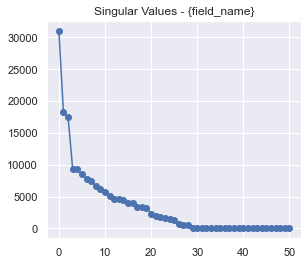

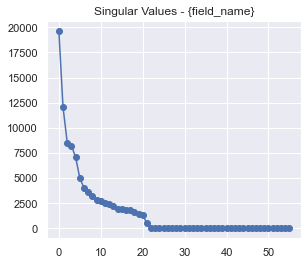

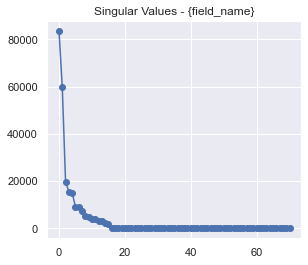

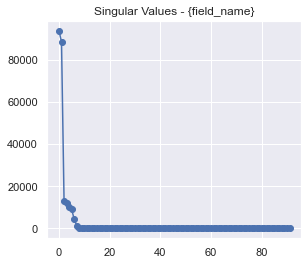

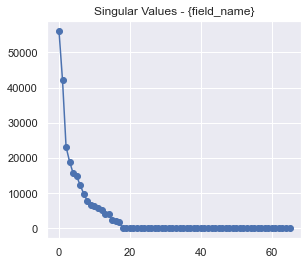

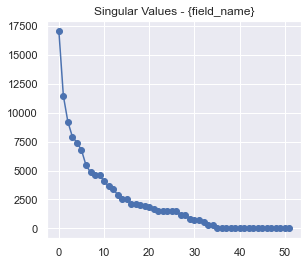

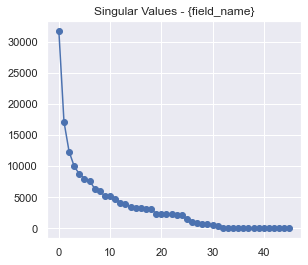

In [40]:
for field_name, G in Gs.items():
    
    M = nx.adjacency_matrix(G).todense()

    U_M, s_M, V_M = np.linalg.svd(M)

    plt.figure(figsize=(10, 4))
    plt.subplot(121)
    plt.plot(s_M, 'b-o')
    plt.title("Singular Values - {field_name}")



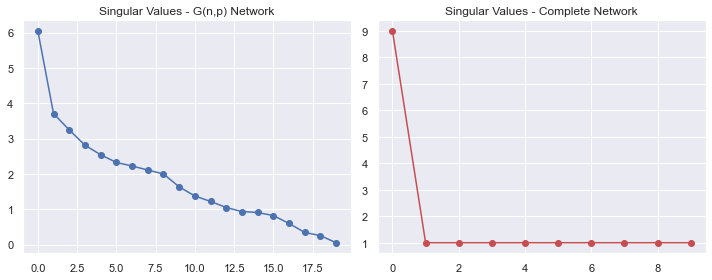

In [38]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# G(n,p) network generation
n = 20  # Number of nodes in G(n,p) network
p = 0.3  # Probability of an edge in G(n,p) network

gnp_network = nx.fast_gnp_random_graph(n, p)
gnp_adj_matrix = nx.to_numpy_array(gnp_network)

# Complete network generation
k = 10  # Number of nodes in complete network

complete_network = nx.complete_graph(k)
complete_adj_matrix = nx.to_numpy_array(complete_network)

# Perform SVD
gnp_U, gnp_S, gnp_Vt = np.linalg.svd(gnp_adj_matrix)
complete_U, complete_S, complete_Vt = np.linalg.svd(complete_adj_matrix)

# Plot singular values
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(gnp_S, 'b-o')
plt.title("Singular Values - G(n,p) Network")

plt.subplot(122)
plt.plot(complete_S, 'r-o')
plt.title("Singular Values - Complete Network")

plt.tight_layout()
plt.show()


In [39]:
import networkx as nx
import numpy as np

# G(n,p) network generation
n = 20  # Number of nodes in G(n,p) network
p = 0.3  # Probability of an edge in G(n,p) network

gnp_network = nx.fast_gnp_random_graph(n, p)
gnp_adj_matrix = nx.to_numpy_array(gnp_network)

# Complete network generation
k = 10  # Number of nodes in complete network

complete_network = nx.complete_graph(k)
complete_adj_matrix = nx.to_numpy_array(complete_network)

# Perform SVD
gnp_U, gnp_S, gnp_Vt = np.linalg.svd(gnp_adj_matrix)
complete_U, complete_S, complete_Vt = np.linalg.svd(complete_adj_matrix)

# Singular Value Decay
gnp_decay = np.diff(gnp_S)
complete_decay = np.diff(complete_S)

# Singular Value Ratio
gnp_ratio = gnp_S[0] / gnp_S[np.nonzero(gnp_S)[0][-1]]
complete_ratio = complete_S[0] / complete_S[np.nonzero(complete_S)[0][-1]]

# Rank Comparison
gnp_rank = np.count_nonzero(gnp_S)
complete_rank = np.count_nonzero(complete_S)

# Reconstruction Error
gnp_reconstructed = gnp_U[:, :gnp_rank] @ np.diag(gnp_S[:gnp_rank]) @ gnp_Vt[:gnp_rank, :]
gnp_error = np.linalg.norm(gnp_adj_matrix - gnp_reconstructed)
complete_reconstructed = complete_U[:, :complete_rank] @ np.diag(complete_S[:complete_rank]) @ complete_Vt[:complete_rank, :]
complete_error = np.linalg.norm(complete_adj_matrix - complete_reconstructed)

# Print the results
print("Singular Value Decay - G(n,p) Network:", gnp_decay)
print("Singular Value Decay - Complete Network:", complete_decay)
print("Singular Value Ratio - G(n,p) Network:", gnp_ratio)
print("Singular Value Ratio - Complete Network:", complete_ratio)
print("Rank Comparison - G(n,p) Network:", gnp_rank)
print("Rank Comparison - Complete Network:", complete_rank)
print("Reconstruction Error - G(n,p) Network:", gnp_error)
print("Reconstruction Error - Complete Network:", complete_error)

Singular Value Decay - G(n,p) Network: [-2.33562928 -0.7263106  -0.27125557 -0.3308527  -0.08767807 -0.59272973
 -0.03705444 -0.32520726 -0.18036609 -0.10428358 -0.17210969 -0.15732341
 -0.01979953 -0.25609122 -0.01806869 -0.36492798 -0.09168586 -0.15996054
 -0.13521124]
Singular Value Decay - Complete Network: [-8.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.11022302e-16]
Singular Value Ratio - G(n,p) Network: 37.891771849831606
Singular Value Ratio - Complete Network: 9.000000000000002
Rank Comparison - G(n,p) Network: 20
Rank Comparison - Complete Network: 10
Reconstruction Error - G(n,p) Network: 6.713117546181933e-14
Reconstruction Error - Complete Network: 1.648135265729833e-15


In [6]:
import networkx as nx
import pymc3 as pm


pm.__version__

'3.11.5'

In [3]:
n = 100

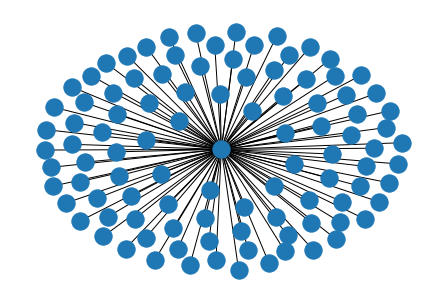

In [14]:
G_star = nx.star_graph(n)
nx.draw(G_star)

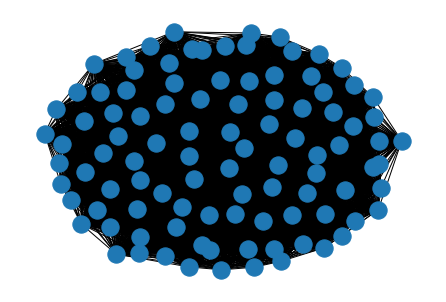

In [15]:
G_star = nx.complete_graph(n)
nx.draw(G_star)

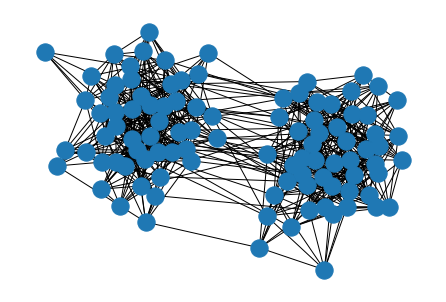

In [16]:
sizes = [int(n/2), int(n/2)]
probs = [[0.25, 0.02], 
         [0.02, 0.25]]
G_sbm_2 = nx.stochastic_block_model(sizes, probs, seed=0)
nx.draw(G_sbm_2)

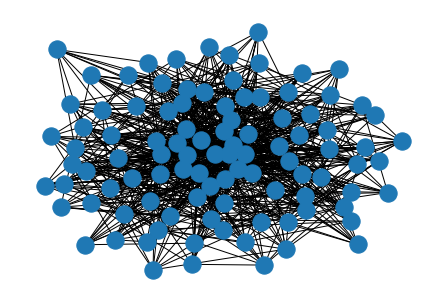

In [17]:
G_powerlaw_cluster = nx.powerlaw_cluster_graph(n, 10, 0.25)
nx.draw(G_powerlaw_cluster)

In [18]:
nx.density(G_powerlaw_cluster)

0.1781818181818182

'3.11.5'

In [3]:
! pip3 install pymc --upgrade


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: /usr/local/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip
